### Goal: Build a text classification model to predict the artist from a piece of text.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/Users/lara/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/lara/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [84]:
df_train = pd.read_csv('data/df/df_train_count_vectorizer.csv')
df_test = pd.read_csv('data/df/df_test_count_vectorizer.csv')

df_test.head(20)

,accident,ache,achilles,act,action,add,addicted,address,admit,adore,...,yeah,year,yearn,yellow,yes,yonder,young,youth,zone,y_test
0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,rolling_blackouts_coastal_fever
1,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,rolling_blackouts_coastal_fever
2,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,bastille_
3,0.0,0.2114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,rolling_blackouts_coastal_fever
4,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,rolling_blackouts_coastal_fever
5,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.073663,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,bastille_
6,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,rolling_blackouts_coastal_fever
7,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,bastille_
8,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,rolling_blackouts_coastal_fever
9,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,bastille_


In [9]:
df_train.head(2)


,accident,ache,achilles,act,action,add,addicted,address,admit,adore,...,yeah,year,yearn,yellow,yes,yonder,young,youth,zone,y_train
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rolling_blackouts_coastal_fever
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,bastille_


### try different classifiers
### try undersampling, oversampling and 

In [10]:
# class imbalance measures only on the training data!


In [11]:
# calculate the percentage of observations belonging to class 1
df_train['y_train'].value_counts(normalize=True)

bastille_                          0.727273
rolling_blackouts_coastal_fever    0.272727
Name: y_train, dtype: float64

In [12]:
df_test['y_test'].value_counts(normalize=True)

bastille_                          0.608696
rolling_blackouts_coastal_fever    0.391304
Name: y_test, dtype: float64

In [13]:
# Create a function that prints scores and a confusion matrix for a specified model
def print_evaluations(ytrue, ypred, model):
    '''
    Prints the confusion matrix and some evaluation metrics for 
    a specified model.
    '''
    print(f'How does model {model} score:')
    print(f'The accuracy of the model is: {round(accuracy_score(ytrue, ypred), 3)}')
    print(f'The precision of the model is: {round(precision_score(ytrue, ypred, pos_label="bastille_" ), 3)}')
    print(f'The recall of the model is: {round(recall_score(ytrue, ypred, pos_label="bastille_"), 3)}')
    print(f'The f1-score of the model is: {round(f1_score(ytrue, ypred, pos_label="bastille_"), 3)}')
    
    # , pos_label='bastille_'
    # , labels= ['bastille_', 'rolling_blackouts_coastal_fever']
    
    #print confusion matrix
    fig = plt.figure(figsize=(12, 12))
    cm = confusion_matrix(ytrue, ypred)
    print(cm)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='.0f', ax= ax)
    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['bastille', 'rolling blackouts'])
    ax.yaxis.set_ticklabels(['bastille', 'rolling blackouts'])

In [14]:
X_train = df_train.iloc[:,:-1]
y_train = df_train.y_train

X_train.shape, y_train.shape

((88, 1358), (88,))

In [15]:
X_test = df_test.iloc[:,:-1]
y_test = df_test.y_test

X_test.shape, y_test.shape
X_test.head()

,accident,ache,achilles,act,action,add,addicted,address,admit,adore,...,yard,yeah,year,yearn,yellow,yes,yonder,young,youth,zone
0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.2114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Train RandomForestClassifier

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, \
                            recall_score, confusion_matrix, f1_score


rf = RandomForestClassifier(n_estimators=20, max_depth=3, random_state=10)

/Users/lara/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/lara/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/lara/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [17]:
# Fit the model on the training data
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=20, random_state=10)

In [98]:
# Make predictions on the test data
ypred_rf = rf.predict(X_test)
ypred_rf

array(['rolling_blackouts_coastal_fever', 'bastille_', 'bastille_',
       'bastille_', 'rolling_blackouts_coastal_fever', 'bastille_',
       'bastille_', 'bastille_', 'rolling_blackouts_coastal_fever',
       'bastille_', 'rolling_blackouts_coastal_fever', 'bastille_',
       'bastille_', 'bastille_', 'bastille_', 'bastille_', 'bastille_',
       'bastille_', 'bastille_', 'bastille_', 'bastille_', 'bastille_',
       'bastille_'], dtype=object)

In [88]:
# make predictions for a single row of the count vectorizer matrix
single_ypred_rf = rf.predict(np.array((X_test.iloc[4,:])).reshape(1, -1))
single_ypred_rf

array(['rolling_blackouts_coastal_fever'], dtype=object)

In [100]:
type(y_test)

pandas.core.series.Series

In [101]:
y_test.shape

(23,)

In [102]:
ypred_rf.shape

(23,)

How does model RandomForest score:
The accuracy of the model is: 0.696
The precision of the model is: 0.684
The recall of the model is: 0.929
The f1-score of the model is: 0.788
[[13  1]
 [ 6  3]]


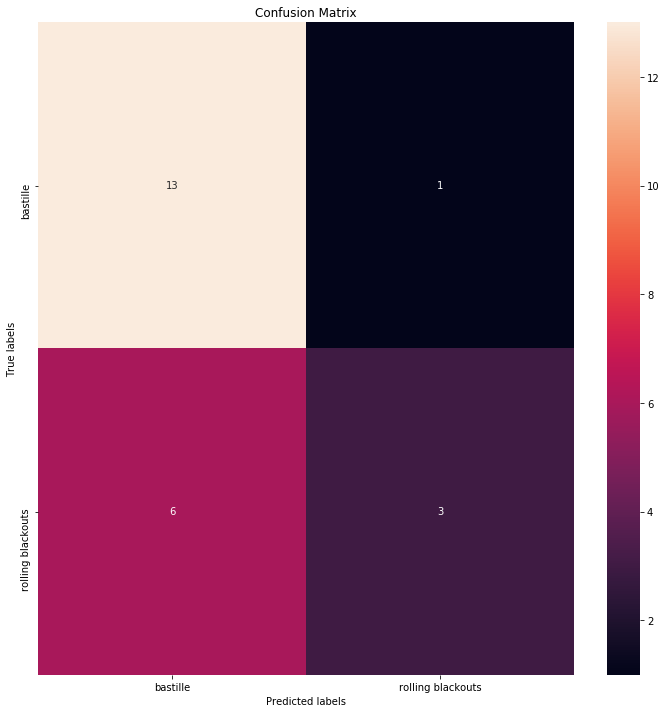

In [99]:
# Inspect the evaluators
print_evaluations(y_test.values, ypred_rf, 'RandomForest')

### Apply Undersampling

In [22]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss

/Users/lara/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [23]:
# Instantiate both resamplers
rus = RandomUnderSampler(sampling_strategy={'bastille_':50})
nm = NearMiss(sampling_strategy={'bastille_':50})

In [24]:
# Resample according to both resamplers
X_rus, y_rus = rus.fit_resample(X_train, y_train)
X_nm, y_nm = nm.fit_resample(X_train, y_train)

In [25]:
X_rus.shape, y_rus.shape

((74, 1358), (74,))

How does model RandomUndersampling score:
The accuracy of the model is: 0.609
The precision of the model is: 0.609
The recall of the model is: 1.0
The f1-score of the model is: 0.757
[[14  0]
 [ 9  0]]


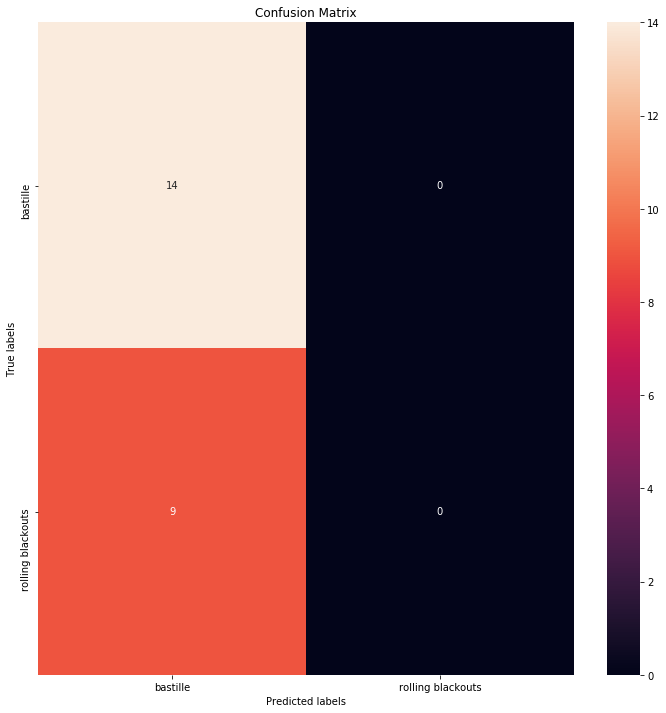

In [26]:
# Fit the random undersampling model, 
# make predictions and inspect evaluations
rf.fit(X_rus, y_rus)
ypred_rus = rf.predict(X_test)
print_evaluations(y_test, ypred_rus, 'RandomUndersampling')

How does model NearMiss score:
The accuracy of the model is: 0.652
The precision of the model is: 0.636
The recall of the model is: 1.0
The f1-score of the model is: 0.778
[[14  0]
 [ 8  1]]


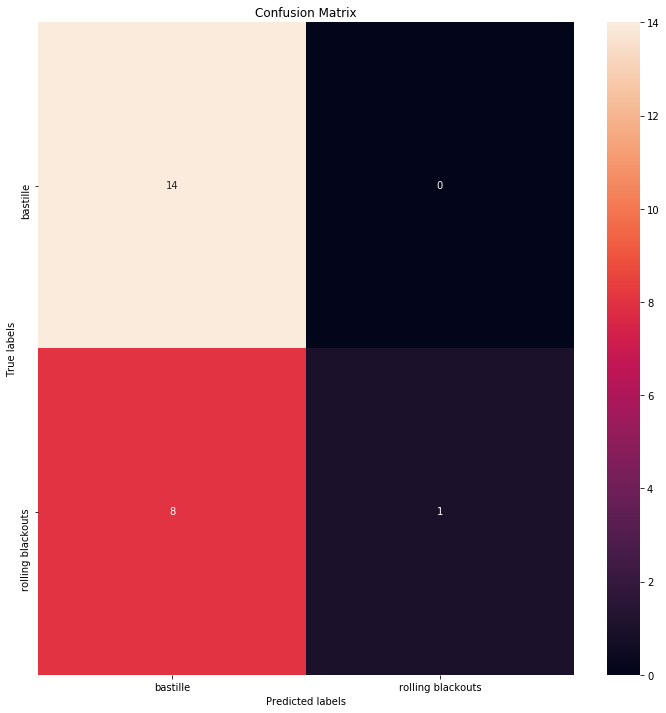

In [27]:
# Fit the Near Miss, 
# make predictions and inspect evaluations
rf.fit(X_nm, y_nm)
ypred_nm = rf.predict(X_test)
print_evaluations(y_test, ypred_nm, 'NearMiss')

### Apply Oversampling

In [28]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [29]:
# RandomOverSampler Model
ros = RandomOverSampler(sampling_strategy={'rolling_blackouts_coastal_fever':64})

In [30]:
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [31]:
np.unique(y_ros, return_counts=True)

(array(['bastille_', 'rolling_blackouts_coastal_fever'], dtype=object),
 array([64, 64]))

How does model RandomOversampling score:
The accuracy of the model is: 0.696
The precision of the model is: 0.684
The recall of the model is: 0.929
The f1-score of the model is: 0.788
[[13  1]
 [ 6  3]]


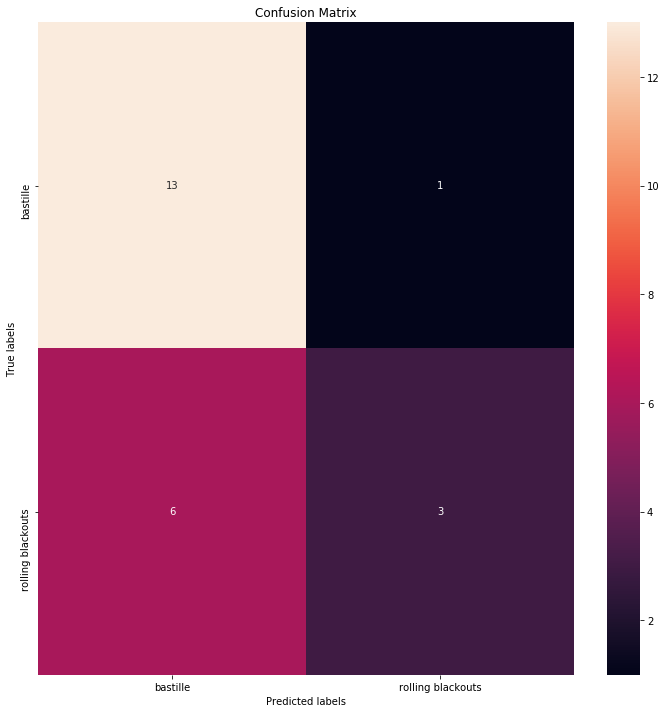

In [32]:
# Fit the RandomOverSampling, 
# make predictions and inspect evaluations
rf.fit(X_ros, y_ros)
ypred_ros = rf.predict(X_test)
print_evaluations(y_test, ypred_ros, 'RandomOversampling')

#### -> Oversampling improves my model!


### Use the Naive Bayes MultinomialNB

`class sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)`

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

*Notes:*

*- Naive Bayes will produce bad results if the dataset contains outliers -> feature engineering becomes more important*

*- it can deal with class imbalance - no preprocessing needed?*

In [33]:
from sklearn.naive_bayes import MultinomialNB

In [50]:
nb = MultinomialNB(alpha=1)

In [51]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1)

In [52]:
ypred_nb = nb.predict(X_test)
ypred_nb

array(['bastille_', 'bastille_', 'bastille_', 'bastille_', 'bastille_',
       'bastille_', 'bastille_', 'bastille_', 'bastille_', 'bastille_',
       'bastille_', 'bastille_', 'bastille_', 'bastille_', 'bastille_',
       'bastille_', 'bastille_', 'bastille_', 'bastille_', 'bastille_',
       'bastille_', 'bastille_', 'bastille_'], dtype='<U31')

How does model Naive Bayes MultinomialNB score:
The accuracy of the model is: 0.609
The precision of the model is: 0.609
The recall of the model is: 1.0
The f1-score of the model is: 0.757
[[14  0]
 [ 9  0]]


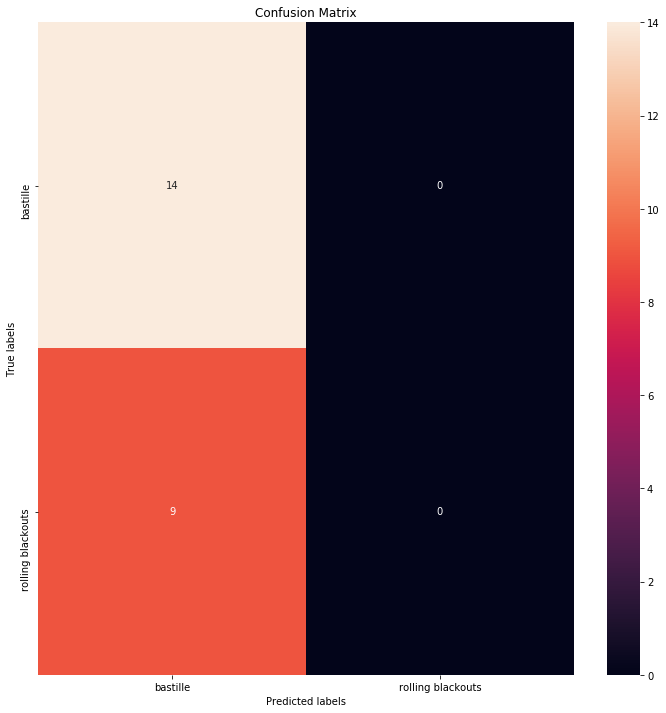

In [53]:
print_evaluations(y_test.values, ypred_nb, 'Naive Bayes MultinomialNB')

### try with Naive Bayes with random oversampled data:

How does model Naive Bayes MultinomialNB Random Oversampled score:
The accuracy of the model is: 0.609
The precision of the model is: 0.609
The recall of the model is: 1.0
The f1-score of the model is: 0.757
[[14  0]
 [ 9  0]]


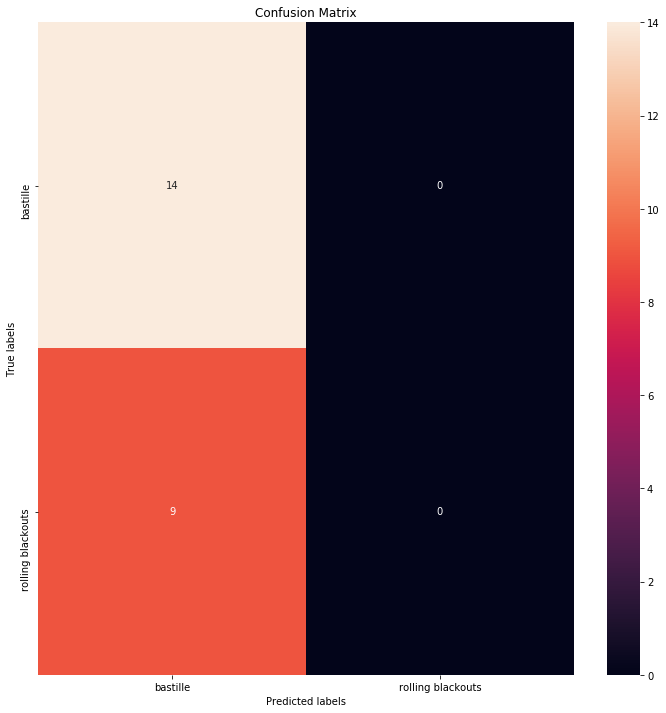

In [93]:
nb2 = MultinomialNB(alpha=1)
nb2.fit(X_ros, y_ros)
ypred_nb = nb.predict(X_test)
print_evaluations(y_test.values, ypred_nb, 'Naive Bayes MultinomialNB Random Oversampled')

## same results!

### Use LogisticRegressionModel

In [54]:
from sklearn.linear_model import LogisticRegression

In [69]:
log_r = LogisticRegression(C=1.0, random_state=42)

In [70]:
log_r.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [71]:
ypred_log_r = nb.predict(X_test)
ypred_log_r

array(['bastille_', 'bastille_', 'bastille_', 'bastille_', 'bastille_',
       'bastille_', 'bastille_', 'bastille_', 'bastille_', 'bastille_',
       'bastille_', 'bastille_', 'bastille_', 'bastille_', 'bastille_',
       'bastille_', 'bastille_', 'bastille_', 'bastille_', 'bastille_',
       'bastille_', 'bastille_', 'bastille_'], dtype='<U31')

How does model Logistic Regression score:
The accuracy of the model is: 0.609
The precision of the model is: 0.609
The recall of the model is: 1.0
The f1-score of the model is: 0.757
[[14  0]
 [ 9  0]]


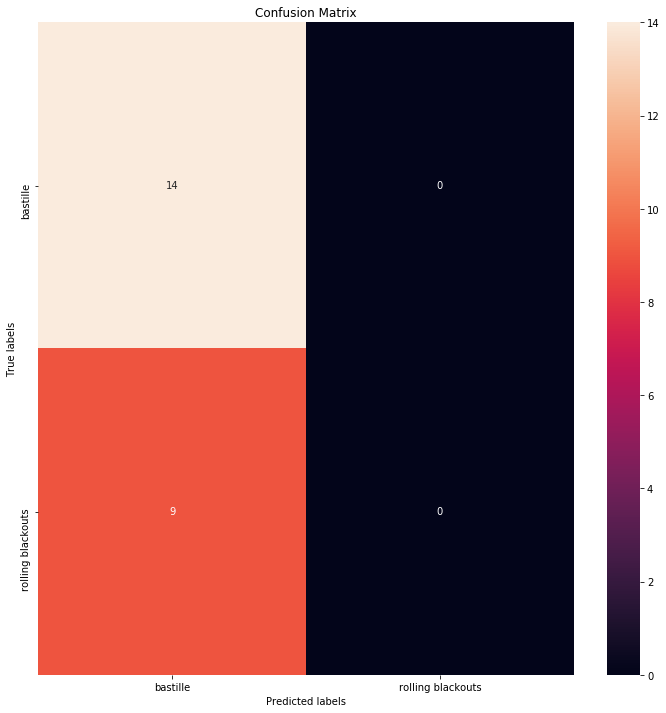

In [72]:
print_evaluations(y_test.values, ypred_log_r, 'Logistic Regression')